**EDA - 2   Car Sales**

**About - Dataset:-**

The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

**Source:-** https://drive.google.com/file/d/1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U/view?usp=drive_link

**Description:-**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

**Questions:-**

1) What is the average selling price of cars for each dealer, and how does it compare across different dealers?

2) Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

3) What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

4) What is the distribution of car prices across different regions?

5) What is the distribution of cars based on body styles?

6) How does the average selling price of cars vary by customer gender and annual income?

7) What is the distribution of car prices by region, and how does the number of cars sold vary by region?

8) How does the average car price differ between cars with different engine sizes?

9)  How do car prices vary based on the customer’s annual income bracket?

10) What are the top 5 car models with the highest number of sales, and how does their price distribution look?

11) How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

12) Is there any seasonal trend in car sales based on the date of sale?

13) How does the car price distribution change when considering different combinations of body style and
transmission type?

14) What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

15) How does the average car price vary across different car models and engine types?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [ ]:
df = pd.read_csv("/content/Car Sale.csv")
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
# Check the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
df.isnull()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23902,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23903,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23904,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Get summary statistics
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [ ]:
# Check for duplicate rows
df.duplicated().sum()


0

In [ ]:
# Check unique values in categorical columns
df['Gender'].value_counts()
df['Transmission'].value_counts()
df['Body Style'].value_counts()

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


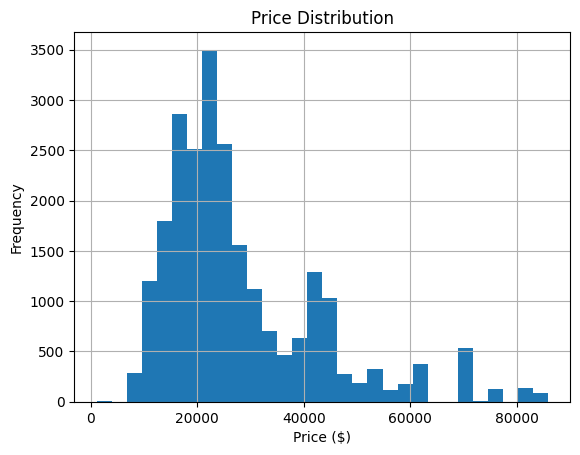

In [ ]:
# Plot histogram for numerical features
df['Price ($)'].hist(bins=30)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

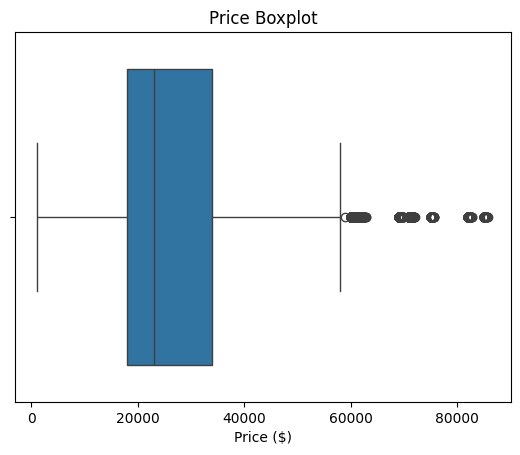

In [ ]:
# Boxplot for Price
sns.boxplot(x='Price ($)', data=df)
plt.title('Price Boxplot')
plt.show()

In [ ]:
#average selling price of cars for each dealer and how it compares across different dealers, follow these steps:

In [ ]:
# Grouping the dataset by 'Dealer_Name' and calculating the average selling price for each dealer
average_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
average_price_per_dealer

,Dealer_Name,Price ($)
0,Buddy Storbeck's Diesel Service Inc,27217.261563
1,C & M Motors Inc,28111.755200
2,Capitol KIA,28189.703822
3,Chrysler Plymouth,27555.526400
4,Chrysler of Tri-Cities,28123.091054
5,Classic Chevy,28602.014446
6,Clay Johnson Auto Sales,27816.027113
7,Diehl Motor CO Inc,27993.929487
8,Enterprise Rent A Car,28312.580800
9,Gartner Buick Hyundai Saab,28247.621019


In [ ]:
# Sorting the dealers by the average price in descending order to see which dealers have the highest average price
average_price_per_dealer_sorted = average_price_per_dealer.sort_values(by='Price ($)', ascending=False)
average_price_per_dealer_sorted

,Dealer_Name,Price ($)
27,U-Haul CO,28769.919006
5,Classic Chevy,28602.014446
19,Rabun Used Car Sales,28527.536177
11,Iceberg Rentals,28522.958533
8,Enterprise Rent A Car,28312.580800
23,Scrivener Performance Engineering,28297.371589
9,Gartner Buick Hyundai Saab,28247.621019
22,Saab-Belle Dodge,28190.139888
2,Capitol KIA,28189.703822
20,Race Car Help,28163.372706


In [ ]:
# Grouping the dataset by 'Company' (car brand) and calculating the standard deviation of prices
price_variation_per_brand = df.groupby('Company')['Price ($)'].std().reset_index()
price_variation_per_brand

,Company,Price ($)
0,Acura,8183.046414
1,Audi,12904.243867
2,BMW,15065.578723
3,Buick,17142.232626
4,Cadillac,19517.120220
5,Chevrolet,13311.063223
6,Chrysler,11583.286811
7,Dodge,11187.592085
8,Ford,15849.090227
9,Honda,11148.629062


In [ ]:
# Sorting the brands by standard deviation to find the one with the highest variation
price_variation_sorted = price_variation_per_brand.sort_values(by='Price ($)', ascending=False)
price_variation_sorted

,Company,Price ($)
15,Lincoln,19658.050211
24,Saab,19653.740089
4,Cadillac,19517.120220
21,Plymouth,19065.997338
14,Lexus,17852.923492
3,Buick,17142.232626
17,Mercury,16445.172195
19,Nissan,16214.264017
25,Saturn,15990.223671
8,Ford,15849.090227


In [ ]:
#To understand the distribution of car prices for each transmission type and compare the interquartile ranges (IQR), we can perform the following steps:

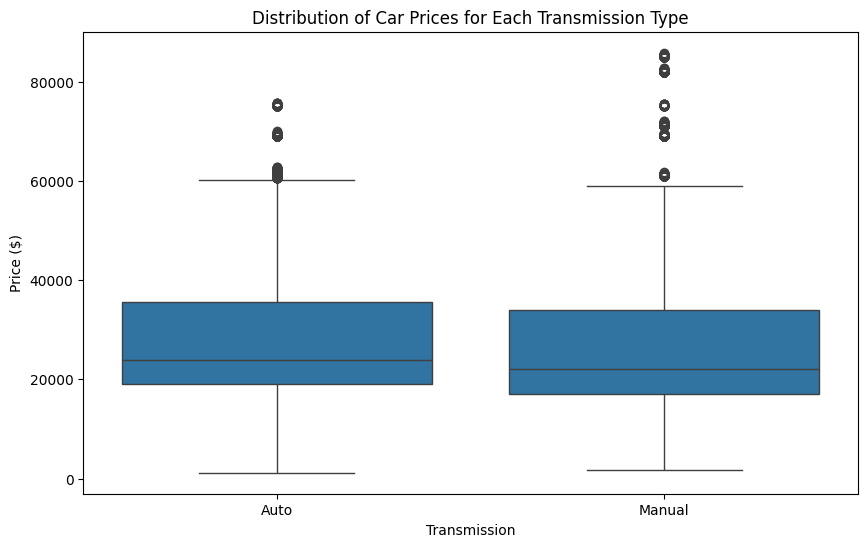

In [ ]:
# Boxplot to visualize distribution of car prices by transmission type
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Distribution of Car Prices for Each Transmission Type')
plt.show()

In [ ]:
# Calculate IQR for each transmission type
q1 = df.groupby('Transmission')['Price ($)'].quantile(0.25)
q3 = df.groupby('Transmission')['Price ($)'].quantile(0.75)
iqr = q3 - q1

In [ ]:
# Display IQR for each transmission type
print("Interquartile Range (IQR) for each Transmission Type:")
print(iqr)

Interquartile Range (IQR) for each Transmission Type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [ ]:
# To analyze the distribution of car prices across different regions, we can use boxplots or violin plots to visualize the spread of prices by region.

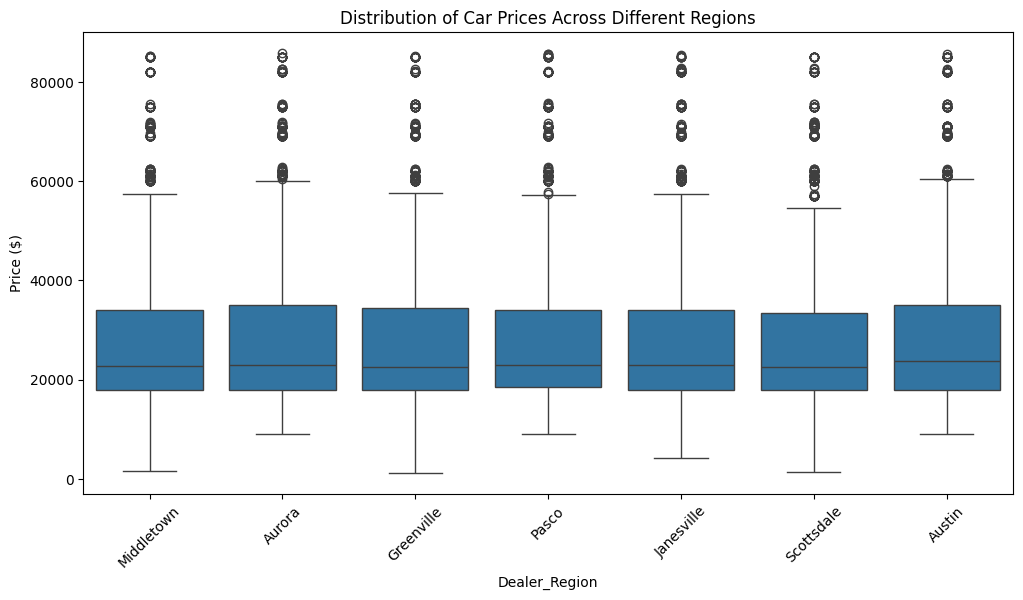

In [ ]:
# Boxplot to visualize distribution of car prices by region
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Distribution of Car Prices Across Different Regions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate summary statistics for car prices by region
region_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
region_stats

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


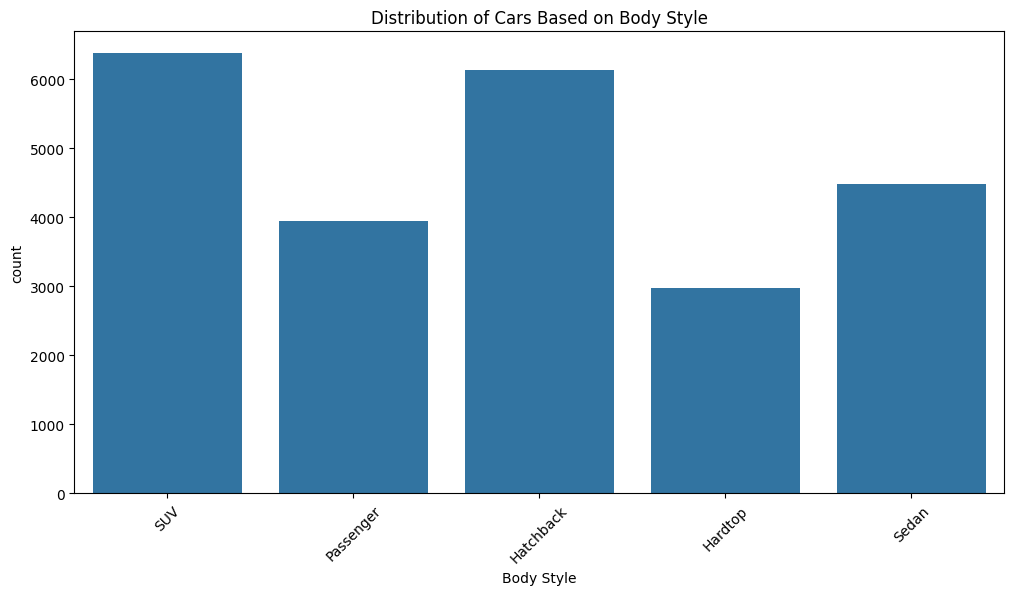

In [ ]:
# Countplot to visualize distribution of cars based on body styles
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Body Style')
plt.title('Distribution of Cars Based on Body Style')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate the percentage of cars for each body style
body_style_distribution = df['Body Style'].value_counts(normalize=True) * 100
body_style_distribution

,proportion
Body Style,
SUV,26.662762
Hatchback,25.633732
Sedan,18.773530
Passenger,16.502133
Hardtop,12.427842


In [ ]:
# Calculate the average selling price by gender
average_price_by_gender = df.groupby('Gender')['Price ($)'].mean()
average_price_by_gender

,Price ($)
Gender,
Female,28277.265270
Male,28039.429407


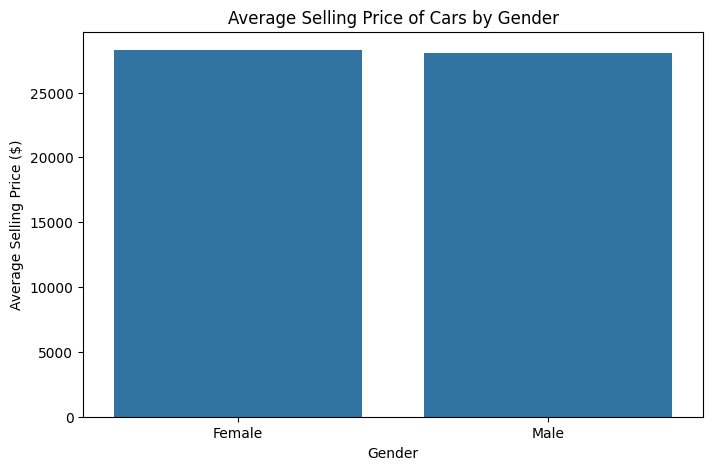

In [ ]:
# Plotting the average selling price by gender
plt.figure(figsize=(8,5))
sns.barplot(x=average_price_by_gender.index, y=average_price_by_gender.values)
plt.title('Average Selling Price of Cars by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Selling Price ($)')
plt.show()

In [ ]:
# To analyze the distribution of car prices by region and how the number of cars sold varies by region, we can follow these steps:

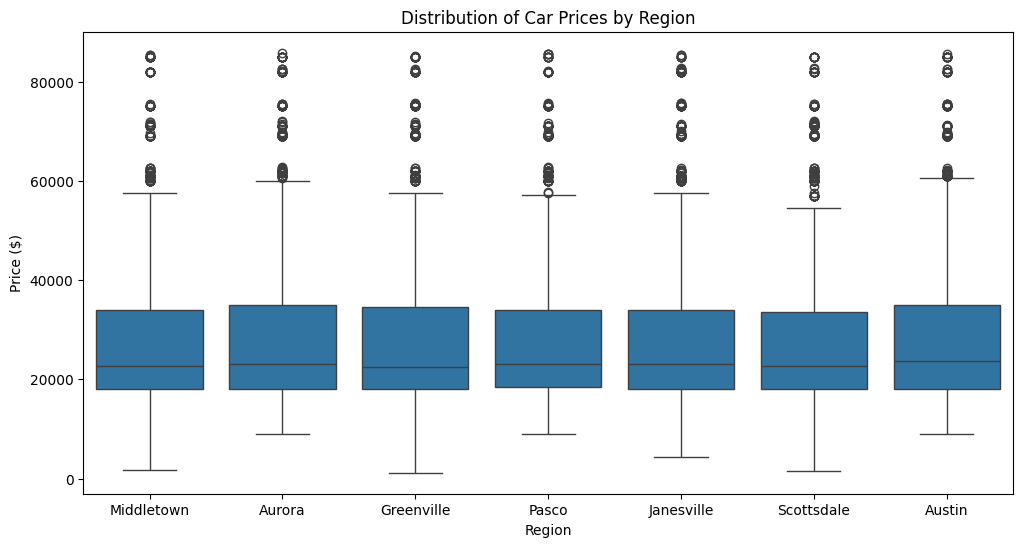

In [ ]:
# Box plot to show the distribution of car prices by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.show()

In [ ]:
# Count the number of cars sold by region
cars_sold_by_region = df['Dealer_Region'].value_counts()
cars_sold_by_region

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Middletown,3128
Greenville,3128


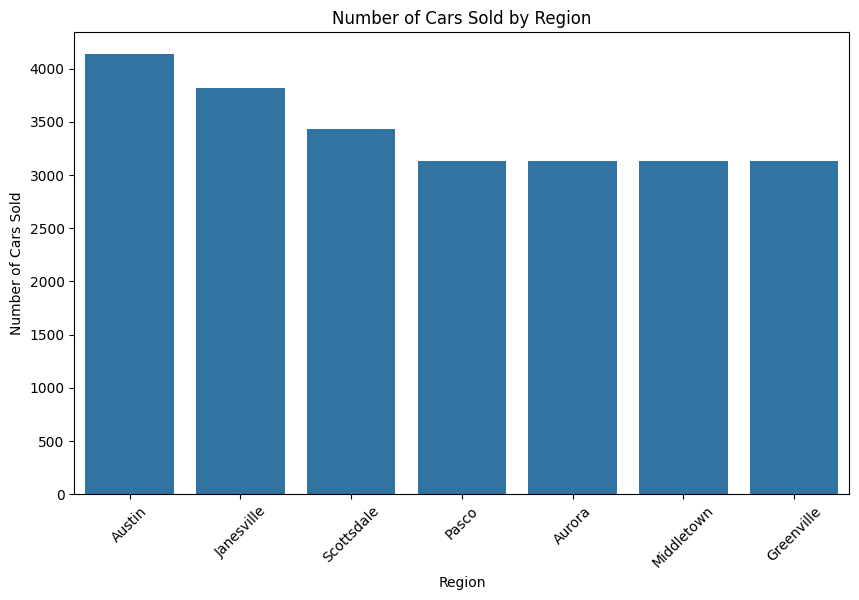

In [ ]:
# Plotting the number of cars sold by region
plt.figure(figsize=(10,6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# We calculate the average selling price (Price ($)) for each engine size.
# Grouping by 'Engine' and calculating the average selling price
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
avg_price_by_engine

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


<ipython-input-117-69688c139eea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette="coolwarm")


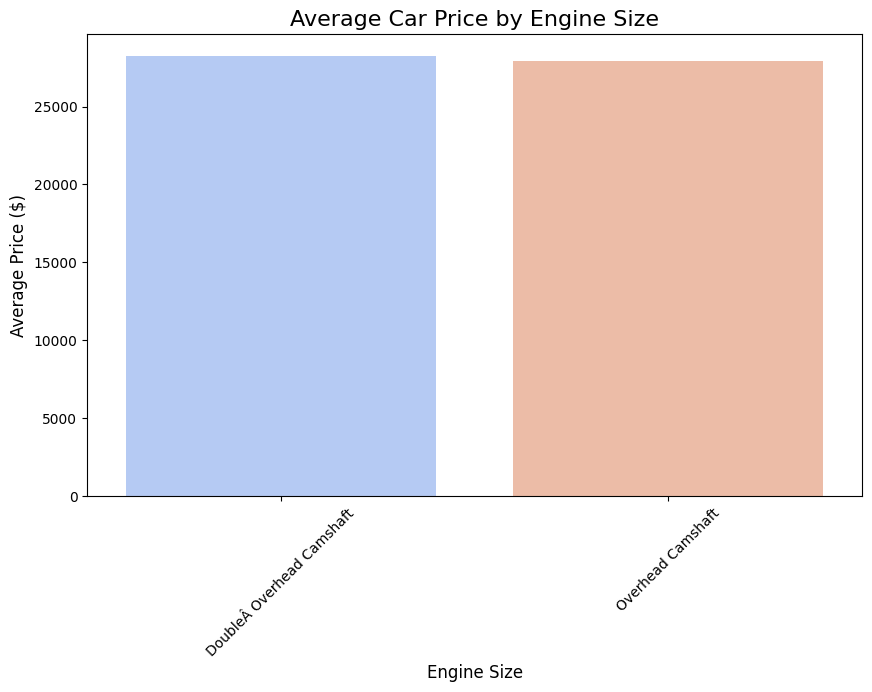

In [ ]:
# Plotting the average price by engine size
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette="coolwarm")
plt.title("Average Car Price by Engine Size", fontsize=16)
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Defining income brackets
bins = [0, 50000, 100000, 150000, 200000, df['Annual Income'].max()]
labels = ['Low (<50k)', 'Medium (50k-100k)', 'High (100k-150k)', 'Upper-High (150k-200k)', 'Luxury (>200k)']

In [ ]:
# Adding a new column for income brackets
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

In [ ]:
# Grouping by income bracket and calculating average car price
avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean()
avg_price_by_income

<ipython-input-120-7d96f22d6fde>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean()


,Price ($)
Income Bracket,
Low (<50k),27884.29782
Medium (50k-100k),43000.00000
High (100k-150k),23200.20000
Upper-High (150k-200k),22650.40000
Luxury (>200k),28152.04346


<ipython-input-121-145a7b138cdd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette="viridis")


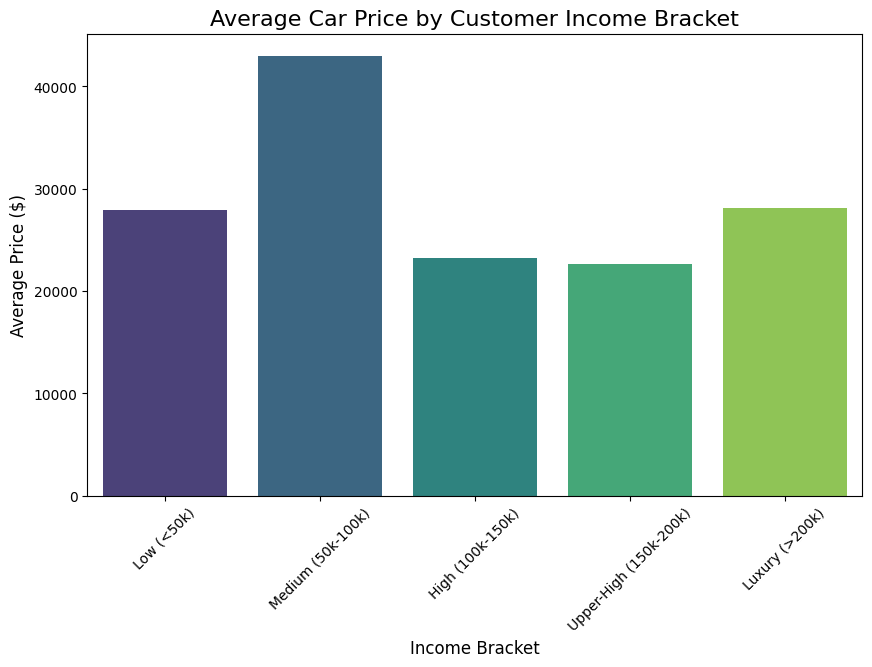

In [ ]:
# Plotting average car price by income bracket
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette="viridis")
plt.title("Average Car Price by Customer Income Bracket", fontsize=16)
plt.xlabel("Income Bracket", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# To analyze the top 5 car models with the highest number of sales and their price distribution, we can follow these steps:

In [ ]:
# Count the number of sales for each car model
top_5_models = df['Model'].value_counts().head(5)
top_5_models

,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


In [ ]:
# Filter the data for the top 5 car models
top_5_data = df[df['Model'].isin(top_5_models.index)]

<ipython-input-125-977ae02559ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_5_data, x='Model', y='Price ($)', palette="Set2")


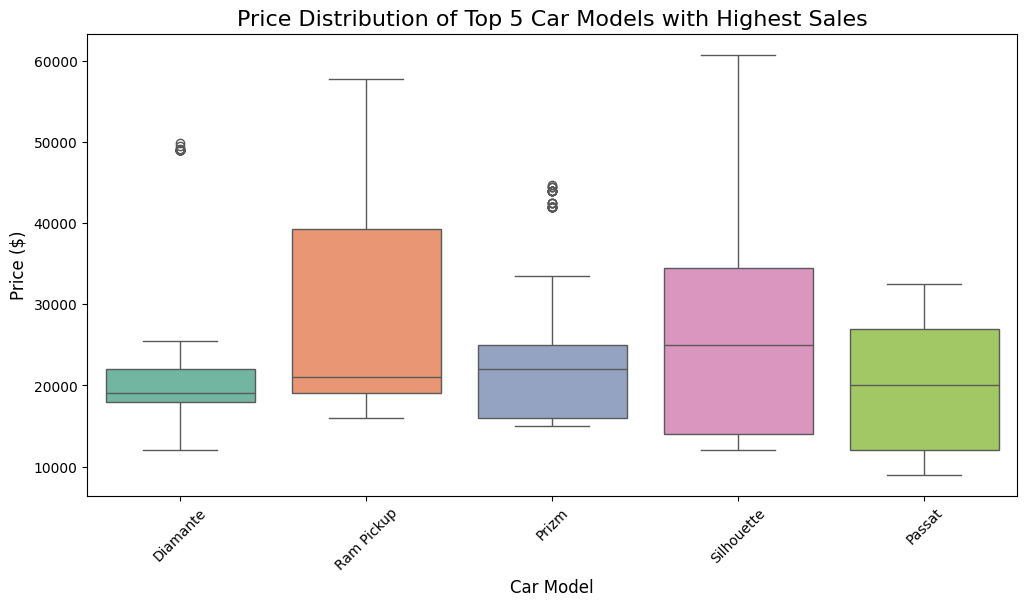

In [ ]:
# Plot the price distribution for the top 5 car models
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_5_data, x='Model', y='Price ($)', palette="Set2")
plt.title("Price Distribution of Top 5 Car Models with Highest Sales", fontsize=16)
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate average price grouped by Engine size and Color
engine_color_price = df.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()
engine_color_price

,Engine,Color,Price ($)
0,DoubleÂ Overhead Camshaft,Black,25766.451103
1,DoubleÂ Overhead Camshaft,Pale White,30347.987460
2,DoubleÂ Overhead Camshaft,Red,27434.392314
3,Overhead Camshaft,Black,31732.967164
4,Overhead Camshaft,Pale White,24327.767694
5,Overhead Camshaft,Red,30153.405229


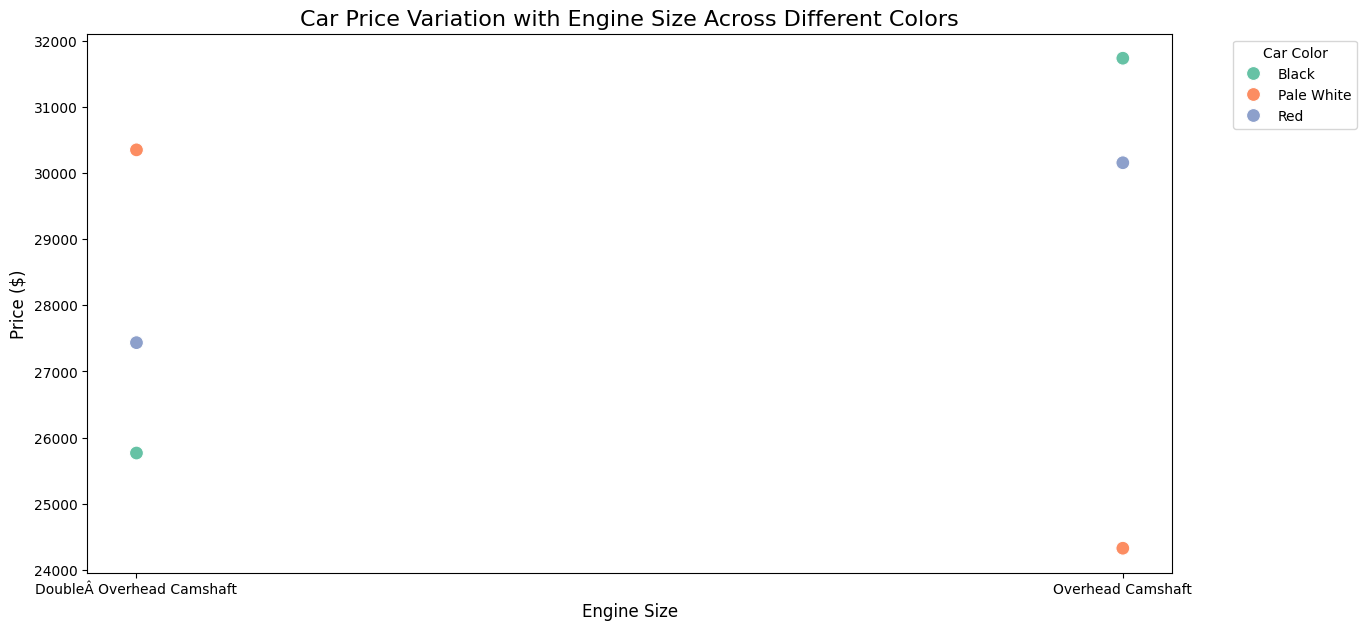

In [ ]:
# Scatter plot for Engine vs Price by Color
plt.figure(figsize=(14, 7))
sns.scatterplot(data=engine_color_price, x='Engine', y='Price ($)', hue='Color', palette='Set2', s=100)
plt.title("Car Price Variation with Engine Size Across Different Colors", fontsize=16)
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.legend(title="Car Color", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Calculate price variation (standard deviation) for each color
color_price_variation = df.groupby('Color')['Price ($)'].std().reset_index()
color_price_variation = color_price_variation.rename(columns={'Price ($)': 'Price Variation'})

In [ ]:
# Sort colors by highest price variation
color_price_variation = color_price_variation.sort_values(by='Price Variation', ascending=False)
color_price_variation

,Color,Price Variation
2,Red,15519.360962
0,Black,15286.065976
1,Pale White,14077.346859


<ipython-input-130-0a805314cf15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_price_variation, x='Price Variation', y='Color', palette='viridis')


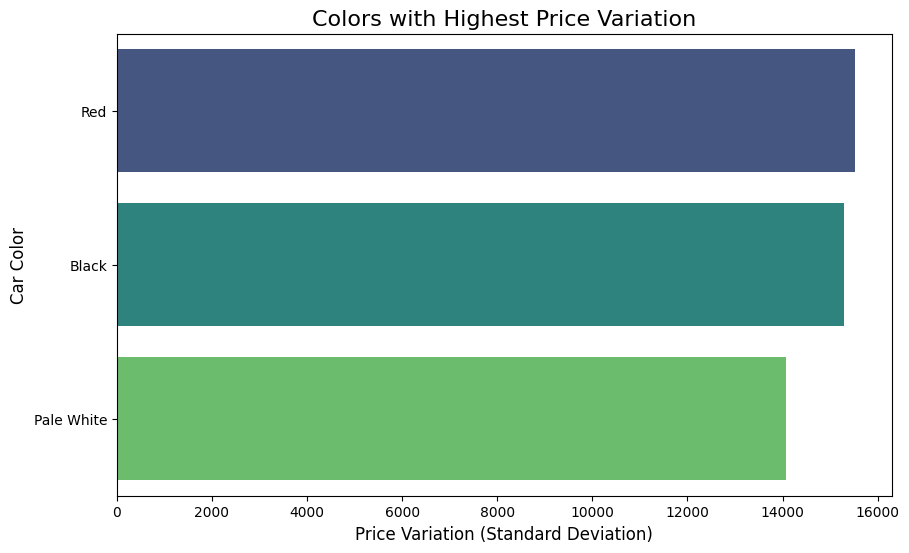

In [ ]:
# Bar plot for price variation by color
plt.figure(figsize=(10, 6))
sns.barplot(data=color_price_variation, x='Price Variation', y='Color', palette='viridis')
plt.title("Colors with Highest Price Variation", fontsize=16)
plt.xlabel("Price Variation (Standard Deviation)", fontsize=12)
plt.ylabel("Car Color", fontsize=12)
plt.show()

In [ ]:
# Convert 'Date' to datetime and extract month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

In [ ]:
# Map months to seasons
def map_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(map_season)

In [ ]:
# Count sales by month and season
monthly_sales = df['Month'].value_counts().sort_index()
seasonal_sales = df['Season'].value_counts()

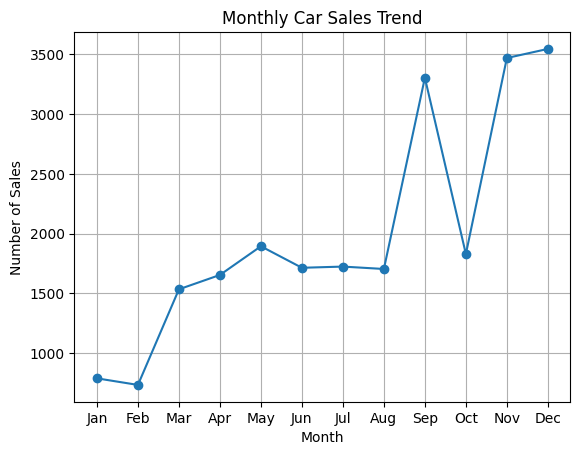

In [ ]:
# Monthly Sales Trend
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Car Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

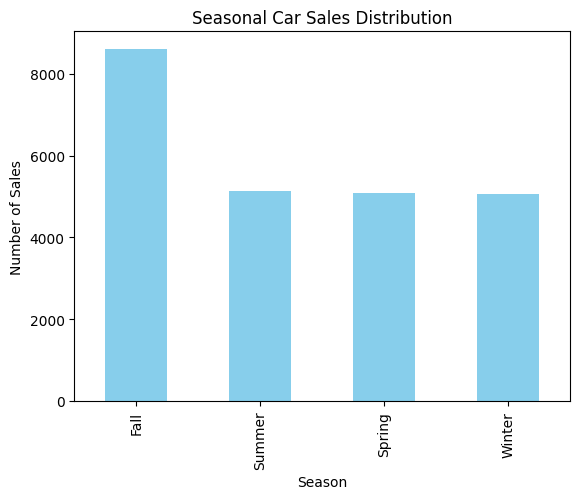

In [ ]:
# Seasonal Sales Distribution
seasonal_sales.plot(kind='bar', color='skyblue')
plt.title("Seasonal Car Sales Distribution")
plt.xlabel("Season")
plt.ylabel("Number of Sales")
plt.show()

In [ ]:
# Group data by Body Style and Transmission and calculate price statistics
price_distribution = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
price_distribution

count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  43125.0  75501.0  
           Manual        22001.0  29000.0  82500.0  
Hatchback  Auto          21500.0  31000.0  75700.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.0  38000.0  69801.0  
           Manual        22000.0  37000.0  85800.0  
SUV        Auto          25000.0  33000.0  75501.0  
           Manual        22000.0  28000.0  85500.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        25000.0  36600.0  69700.0

<Axes: xlabel='Body Style', ylabel='Price ($)'>

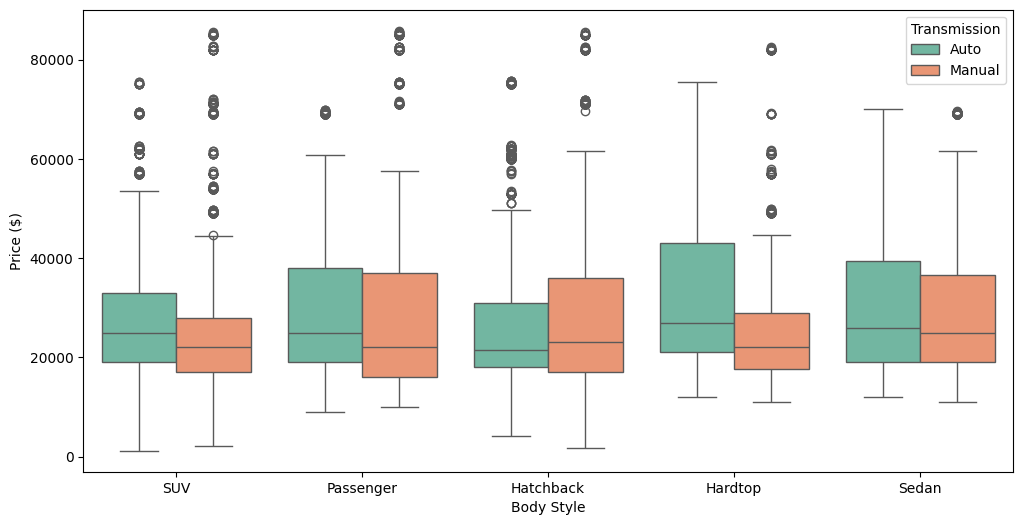

In [ ]:
# Create a boxplot to visualize price distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', palette='Set2')

<ipython-input-138-4f7d8c036538>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Transmission')


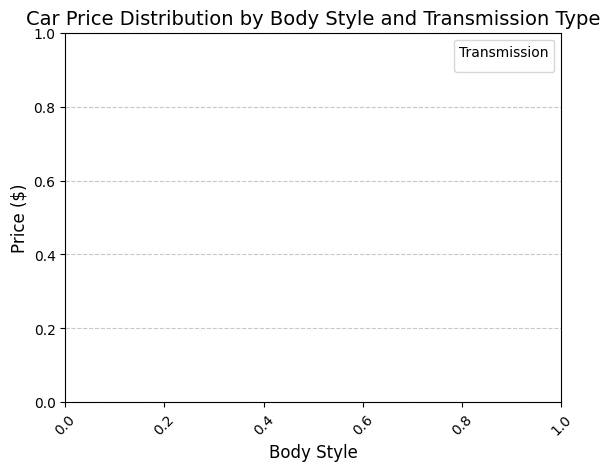

In [ ]:
# Add labels and title
plt.title('Car Price Distribution by Body Style and Transmission Type', fontsize=14)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(title='Transmission')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Select relevant columns
correlation_data = df[['Price ($)', 'Engine', 'Annual Income']]
correlation_data

,Price ($),Engine,Annual Income
0,26000,DoubleÂ Overhead Camshaft,13500
1,19000,DoubleÂ Overhead Camshaft,1480000
2,31500,Overhead Camshaft,1035000
3,14000,Overhead Camshaft,13500
4,24500,DoubleÂ Overhead Camshaft,1465000
...,...,...,...
23901,12000,Overhead Camshaft,13500
23902,16000,DoubleÂ Overhead Camshaft,900000
23903,21000,Overhead Camshaft,705000
23904,31000,DoubleÂ Overhead Camshaft,13500


In [ ]:
# Ensure numeric columns are properly formatted (if needed)
correlation_data['Engine'] = pd.to_numeric(correlation_data['Engine'], errors='coerce')
correlation_data['Annual Income'] = pd.to_numeric(correlation_data['Annual Income'], errors='coerce')


<ipython-input-140-eb061c27e009>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['Engine'] = pd.to_numeric(correlation_data['Engine'], errors='coerce')
<ipython-input-140-eb061c27e009>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['Annual Income'] = pd.to_numeric(correlation_data['Annual Income'], errors='coerce')


In [ ]:
# Drop rows with missing values in the selected columns
correlation_data = correlation_data.dropna()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()
correlation_matrix

,Price ($),Engine,Annual Income
Price ($),NaN,NaN,NaN
Engine,NaN,NaN,NaN
Annual Income,NaN,NaN,NaN


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


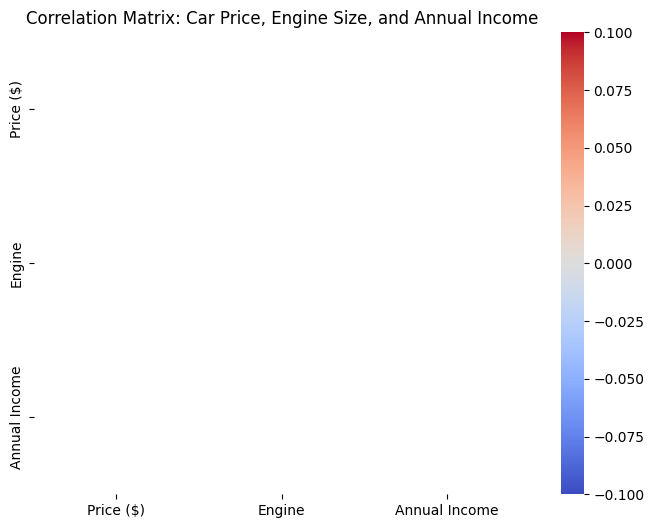

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Car Price, Engine Size, and Annual Income')
plt.show()

<ipython-input-144-e0b509763167>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(
<ipython-input-144-e0b509763167>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Annual Income', bbox_to_anchor=(1.05, 1), loc='upper left')


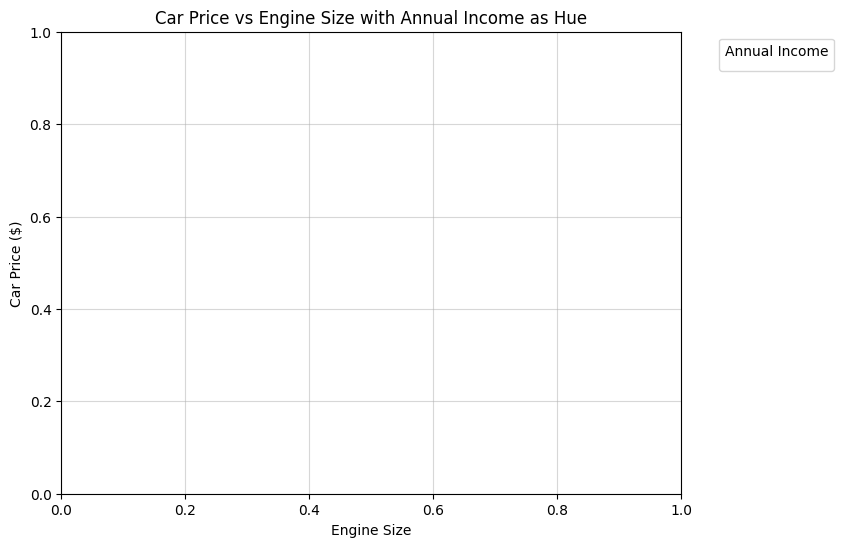

In [ ]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=correlation_data,
    x='Engine',
    y='Price ($)',
    hue='Annual Income',
    palette='viridis'
)
plt.title('Car Price vs Engine Size with Annual Income as Hue')
plt.xlabel('Engine Size')
plt.ylabel('Car Price ($)')
plt.grid(alpha=0.5)

# Add legend instead of colorbar for the hue
plt.legend(title='Annual Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Extract numeric values from the 'Engine' column
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)

In [ ]:
# Filter the dataset for relevant columns
correlation_data = df[['Price ($)', 'Engine', 'Annual Income']].dropna()
correlation_data

,Price ($),Engine,Annual Income


In [ ]:
# Calculate correlation
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Price ($)  Engine  Annual Income
Price ($)            NaN     NaN            NaN
Engine               NaN     NaN            NaN
Annual Income        NaN     NaN            NaN


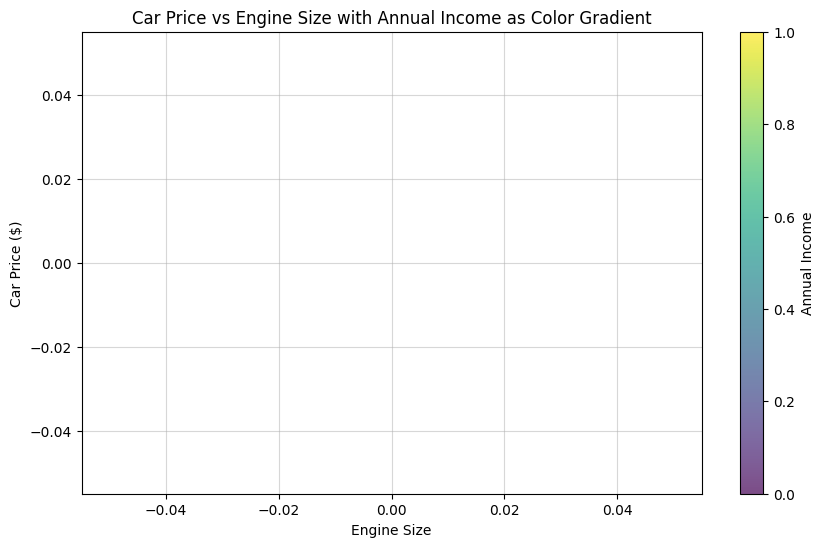

In [ ]:
# Visualize using a scatter plot with a color gradient for Annual Income
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    correlation_data['Engine'],
    correlation_data['Price ($)'],
    c=correlation_data['Annual Income'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Annual Income')
plt.title('Car Price vs Engine Size with Annual Income as Color Gradient')
plt.xlabel('Engine Size')
plt.ylabel('Car Price ($)')
plt.grid(alpha=0.5)
plt.show()

In [ ]:
# Ensure that the 'Engine' column is in string format before using str.extract()
df['Engine'] = df['Engine'].astype(str)

In [ ]:
# Preprocess the 'Engine' column to extract numeric values (engine size)
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)

In [ ]:
# Group by 'Model' and 'Engine' and calculate the average price
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
avg_price_by_model_engine

,Model,Engine,Price ($)


In [ ]:
# Sort by Price for better visualization
avg_price_by_model_engine = avg_price_by_model_engine.sort_values('Price ($)', ascending=False)

In [ ]:
# Display the top 10 models with their engine sizes and average prices
print("Top 10 Car Models and Engine Types with the Highest Average Prices:")
print(avg_price_by_model_engine.head(10))

Top 10 Car Models and Engine Types with the Highest Average Prices:
Empty DataFrame
Columns: [Model, Engine, Price ($)]
Index: []


<ipython-input-155-063e769a3cd0>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Engine Size')


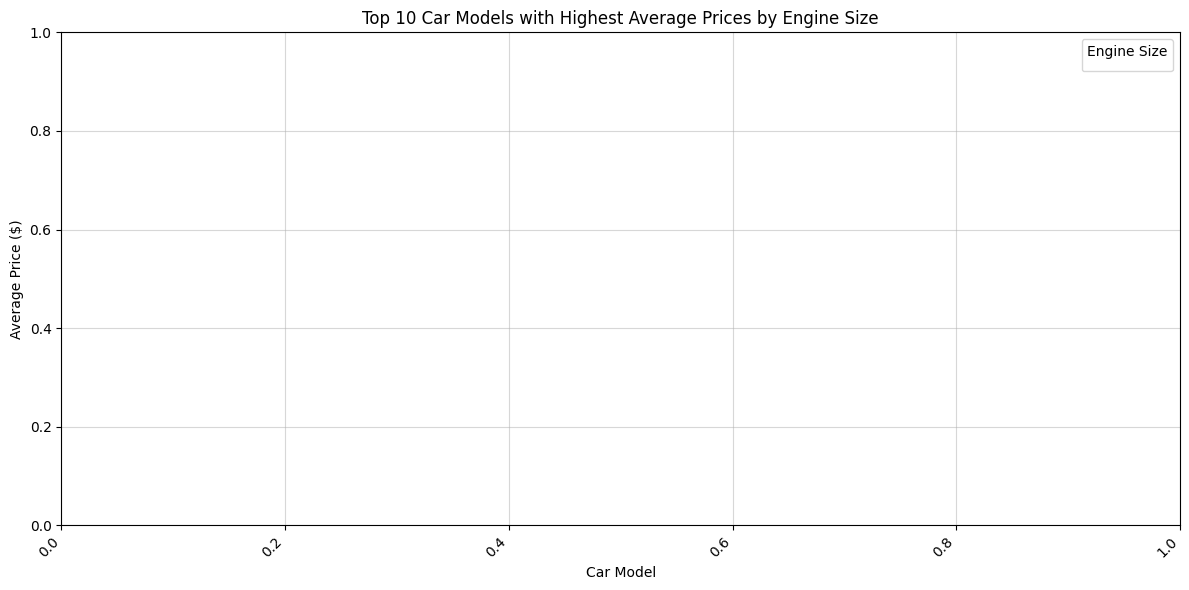

In [ ]:
# Visualization: Bar plot for top 10 car models with highest average prices
top_10 = avg_price_by_model_engine.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Model', y='Price ($)', hue='Engine', dodge=False)
plt.title('Top 10 Car Models with Highest Average Prices by Engine Size')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine Size')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()